# References 
* [Building Autoencoders in Keras](https://blog.keras.io/building-autoencoders-in-keras.html)
* [Matplotlib Gallery](https://matplotlib.org/gallery/index.html)

# Content
* Compress the 4 features of Iris Dataset to 2 features using Autoencoder
* Visualize training using TensorBoard
* Plot the obtained 2 features and assign different colors to different species

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

## Importing Data

In [2]:
data = pd.read_csv("Iris.csv")
x_train, x_test, y_train, y_test = train_test_split(data[['SepalLengthCm', 'SepalWidthCm',
                                                          'PetalLengthCm', 'PetalWidthCm']],
                                                    data['Species'],test_size=0.1, random_state=1)

## Launching TensorBoard

In [3]:
# !wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
# !unzip ngrok-stable-linux-amd64.zip
# LOG_DIR = '/tmp/autoencoder' # Here you have to put your log directory
# get_ipython().system_raw(
#     'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
#     .format(LOG_DIR)
# )
# get_ipython().system_raw('./ngrok http 6006 &')
# ! curl -s http://localhost:4040/api/tunnels | python3 -c \
#     "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

## Linear Encoder and Linear Decoder

In [4]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import TensorBoard

# this is the size of our encoded representations
encoding_dim = 2
input_dim = 4

# this is our input placeholder
input_img = Input(shape=(input_dim,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim)(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(input_dim)(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (2-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(loss='mean_squared_error', optimizer='sgd')

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=135,
                shuffle=True,
                validation_data=(x_test, x_test),
               callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

# encode and decode some data points
# note that we take them from the *test* set
encoded_datapoints = encoder.predict(x_test)
decoded_datapoints = decoder.predict(encoded_datapoints)

print('Original Datapoints :')
print(x_test)
print('Reconstructed Datapoints :')
print(decoded_datapoints)

Using TensorFlow backend.
C:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type


Train on 135 samples, validate on 15 samples


Epoch 1/50
135/135 [==============================] - 0s 644us/step - loss: 20.0125 - val_loss: 9.5409

Epoch 2/50
135/135 [==============================] - 0s 15us/step - loss: 8.8774 - val_loss: 6.7076
Epoch 3/50
135/135 [==============================] - 0s 15us/step - loss: 6.2094 - val_loss: 5.0166
Epoch 4/50
135/135 [==============================] - 0s 15us/step - loss: 4.6281 - val_loss: 3.8556
Epoch 5/50
135/135 [==============================] - 0s 22us/step - loss: 3.5480 - val_loss: 3.0141
Epoch 6/50
135/135 [==============================] - 0s 15us/step - loss: 2.7687 - val_loss: 2.3910
Epoch 7/50
135/135 [==============================] - 0s 15us/step - loss: 2.1942 - val_loss: 1.9271
Epoch 8/50
135/135 [==============================] - 0s 15us/step - loss: 1.7687 - val_loss: 1.5822
Epoch 9/50
135/135 [==============================] - 0s 22us/step - loss: 1.4541 - val_loss: 1.3268
Epoch 10/50
135/135 [===================

## Plotting Encoded Features

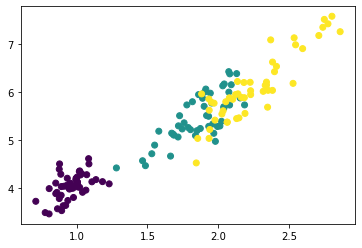

In [5]:
encoded_dataset = encoder.predict(data[['SepalLengthCm', 'SepalWidthCm','PetalLengthCm', 'PetalWidthCm']])

plt.scatter(encoded_dataset[:,0], encoded_dataset[:,1], c=data['Species'].astype('category').cat.codes)
plt.show()